**Persistence Model**

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

df_W = pd.read_csv("WeekyEnergyConsumption_df.csv").set_index("Datetime")
df_W.head()

,Total_MW,Weeks
Datetime,,
2012-01-01,46188.163043,1
2012-01-08,54688.875000,2
2012-01-15,55755.767857,3
2012-01-22,57336.458333,4
2012-01-29,53328.892857,5


**Weekly Resampled Dataset: Train | Test Datasets**

*6-years of data. Train: ~5-years; Test: ~1-year*

In [2]:
X = df_W.Total_MW
size = int(len(X) * 0.837)
train, test = X[0:size], X[size:len(X)]

print("Train set: " + str(len(train)) + " weeks")
print("Test set: " + str(len(test)) + " weeks")

Train set: 262 weeks
Test set: 52 weeks


**Persistence Model**

*Root Mean Squarred Error: Metric of Accuracy of Model*

In [3]:
#Persistence Model:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    #predict
    yhat = history[-1]
    predictions.append(yhat)
    #observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print("rmse: %.3f" % rmse)

>Predicted=49299.982, Expected=57730
>Predicted=57730.220, Expected=55231
>Predicted=55231.435, Expected=49641
>Predicted=49641.423, Expected=52380
>Predicted=52380.220, Expected=55098
>Predicted=55097.673, Expected=50857
>Predicted=50857.173, Expected=49892
>Predicted=49892.060, Expected=46149
>Predicted=46148.762, Expected=50003
>Predicted=50003.262, Expected=49242
>Predicted=49242.334, Expected=54472
>Predicted=54472.232, Expected=47258
>Predicted=47257.786, Expected=45017
>Predicted=45016.780, Expected=45499
>Predicted=45498.649, Expected=43414
>Predicted=43414.054, Expected=44256
>Predicted=44255.690, Expected=45883
>Predicted=45883.107, Expected=44290
>Predicted=44290.208, Expected=43810
>Predicted=43809.887, Expected=49505
>Predicted=49504.774, Expected=44967
>Predicted=44967.071, Expected=48259
>Predicted=48259.024, Expected=49987
>Predicted=49987.131, Expected=60468
>Predicted=60468.101, Expected=54386
>Predicted=54386.238, Expected=52781
>Predicted=52780.994, Expected=55310
>

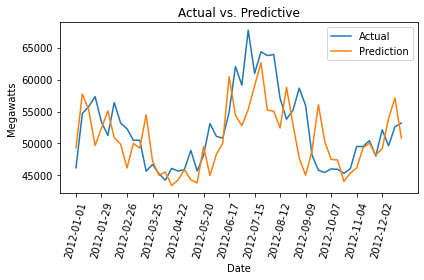

In [12]:
plt.plot(df_W.Total_MW[0:52], label='Actual')
plt.plot(predictions, label="Prediction")
plt.xticks(np.arange(0, len(predictions), 4))
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel('Megawatts')
plt.legend()
plt.title("Actual vs. Predictive")
plt.tight_layout()
plt.savefig("Figures/PersistenceModel.jpg")